In [4]:
import torch

In [22]:
a = torch.randn(2, 2)
b = torch.randn(2, 2)

In [39]:
x = torch.linspace(0, 1, 100)

In [48]:
y = torch.sin(x*2*torch.pi) + torch.randn(100)*0.01

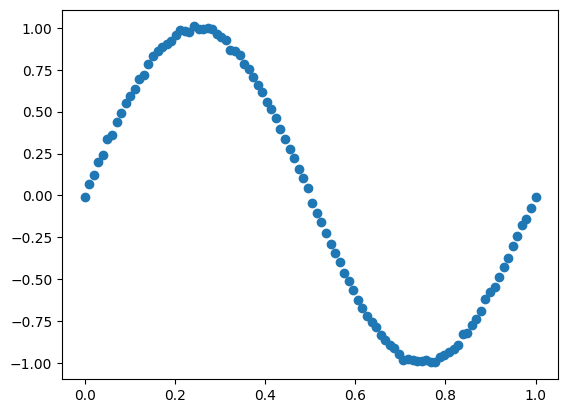

In [67]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

In [100]:
from torch import nn
from torchsummary import summary

# sequential layer
model = nn.Sequential(
    # matrix multi
    # nn.Linear(1, 8),
    nn.Linear(9, 8),
    # activation function
   
    nn.ReLU(),
    nn.Linear(8, 1),
    
)

display(model)

summary(model, (1,), device='cpu')

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              16
              ReLU-2                    [-1, 8]               0
            Linear-3                    [-1, 1]               9
Total params: 25
Trainable params: 25
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [51]:

# batch of size 10 with each having 1 dimension
batch = torch.randn(10, 1)


# [
#     [0.1],
#     [0.2],
#     [0.3]
# ]

# (B, 1)

# x is input and y is target

model(batch)

tensor([[-0.5298],
        [-0.1534],
        [-0.3391],
        [-0.4858],
        [-0.5438],
        [-0.3082],
        [ 0.3906],
        [ 0.3814],
        [-0.5656],
        [ 0.3514]], grad_fn=<AddmmBackward0>)

In [55]:
# x.unsqueeze(1)
model(x.unsqueeze(1))

tensor([[-0.1905],
        [-0.1942],
        [-0.1980],
        [-0.2017],
        [-0.2055],
        [-0.2088],
        [-0.2120],
        [-0.2150],
        [-0.2180],
        [-0.2210],
        [-0.2240],
        [-0.2271],
        [-0.2301],
        [-0.2331],
        [-0.2361],
        [-0.2391],
        [-0.2421],
        [-0.2451],
        [-0.2481],
        [-0.2511],
        [-0.2541],
        [-0.2571],
        [-0.2602],
        [-0.2632],
        [-0.2664],
        [-0.2700],
        [-0.2737],
        [-0.2773],
        [-0.2812],
        [-0.2858],
        [-0.2903],
        [-0.2948],
        [-0.2993],
        [-0.3039],
        [-0.3084],
        [-0.3129],
        [-0.3174],
        [-0.3220],
        [-0.3265],
        [-0.3306],
        [-0.3348],
        [-0.3389],
        [-0.3431],
        [-0.3472],
        [-0.3514],
        [-0.3555],
        [-0.3597],
        [-0.3638],
        [-0.3680],
        [-0.3721],
        [-0.3763],
        [-0.3804],
        [-0.

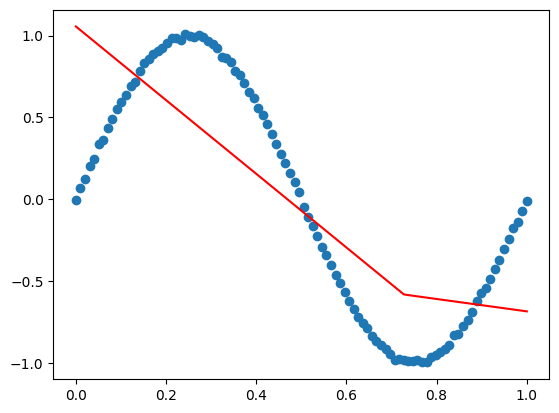

In [102]:
# [[1, 2, 3], [3, 4, 5]] (2, 3)

# model stores all operations
# h(i) knows its past
# gradient descent
# detach only takes output
plt.scatter(x, y)
plt.plot(x, model(x.unsqueeze(1)).detach().numpy(), c='r')

# (outer, inner)
# (1, 2, 3)

# underfitting
# functino is too small for the data


100%|██████████| 3000/3000 [00:02<00:00, 1216.50it/s]


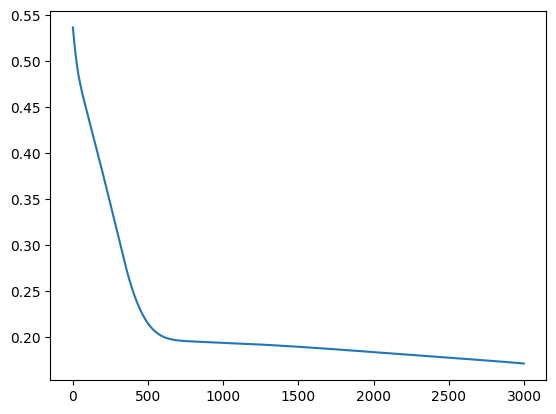

In [101]:
from torch import optim
from tqdm import tqdm

# mean squared error loss
loss_fn = nn.MSELoss()

# the higher the parameters, the faster the change
# SGD ADAM

optimizer = optim.Adam(model.parameters(), lr=1e-3) # 0.001

epochs = 3000

losses = []

for i in tqdm(range(epochs)):
    optimizer.zero_grad()

    # y_hat = model(x.unsqueeze(1))
    y_hat = model(x)
    
    # difference between y hat and y
    loss = loss_fn(y_hat, y.unsqueeze(1))

    losses.append(loss.item())
    
    # parameters -> loss
    # loss.backward() -> parameters.gradients
    # optimizer.step() -> uses optimiers.parameters.gradients to update parameters

    loss.backward()

    optimizer.step()

plt.plot(losses)